### NADILLIA SAHPUTRA (2070770) 
### LAB 5

In [1]:
# library(ggdist)
library(ggplot2)
library(rjags)
library(coda)

Warning message:
“package ‘rjags’ was built under R version 4.2.3”
Loading required package: coda

Warning message:
“package ‘coda’ was built under R version 4.2.1”
Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



1. Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the
Poisson distribution can be very useful in applied statistics when describing low-frequency events
in a large population. In a famous example he showed that the number of deaths by horse kick
among the Prussian army follows the Poisson distribution.

Considering the following to sets of observations taken over a fixed large time interval in two different
corps:
$$
\begin{array}{rrrrrrr}
      \text{y death soldiers} |& 0 & 1 & 2 & 3 & 4 & \geq 5 \\
      \hline
      n_1 \text{observations} |& 109 & 65 & 22 & 3 & 1 & 0 \\
      n_2 \text{observations} |& 144 & 91 & 32 & 11 & 2 & 0\\
\end{array}
$$

- assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

In [2]:
calculate_posterior <- function(a) {
    # Data
    n1 <- c(109, 65, 22, 3, 1, 0)
    n2 <- c(144, 91, 32, 11, 2, 0)
    y <- c(0,1,2,3,4,5)

    y_1 <- sum(n1*y)
    lambda_1 <- sum(n1)

    y_2 <- sum(n2*y)
    lambda_2 <- sum(n2)

    # Gamma posterior from the uniform prior
    alpha_1 <- y_1+a 
    alpha_2 <- y_2+a

    # Count the posterior distribution
    delta <- 0.001 
    mu <- seq(0,5,delta)
    post___1 <- function(mu) dgamma(mu,alpha_1,lambda_1)
    norm_const<- integrate(post___1,0,5)$value
    post___norm_1 <- function(mu) post___1(mu)/norm_const

    post___2 <- function(mu) dgamma(mu,alpha_2,lambda_2)
    norm_const<- integrate(post___2,0,5)$value
    post___norm_2 <- function(mu) post___2(mu)/norm_const

    # Count mean, variance, median
    stats <- function(alpha, lambda, func) {
        mean__ <- alpha/lambda
        variance__ <- alpha/(lambda^2)
        median <- round(uniroot(function(x)integrate(func,0,x)$value-0.5,c(0,5))$root,2)
        return(c(mn = mean__, var = variance__, med = median))}

    cat("The mean n1 is :", stats(alpha_1,lambda_1,post___norm_1)['mn'], "\n")
    cat("The variance n1 is :", stats(alpha_1,lambda_1,post___norm_1)['var'],"\n")
    cat("The median n1 is :", stats(alpha_1,lambda_1,post___norm_1)['med'],"\n")    
    cat("\n")                       
    cat("The mean n2 is :", stats(alpha_2,lambda_2,post___norm_2)['mn'], "\n")
    cat("The variance n2 is :", stats(alpha_2,lambda_2,post___norm_2)['var'], "\n")
    cat("The median n2 is :", stats(alpha_2,lambda_2,post___norm_2)['med'], "\n")    
    cat("\n")  
    cat("The total combine mean is :",  
        stats(alpha_1,lambda_1,post___norm_1)['mn'] - stats(alpha_2,lambda_2,post___norm_2)['mn'], "\n")
    cat("The total combine variance is :",  
        stats(alpha_1,lambda_1,post___norm_1)['var'] + stats(alpha_2,lambda_2,post___norm_2)['var'], "\n")
    cat("\n") 

    # Count 95% credibility
    credibility_bound <- function(x, posterior_function) {
         lower_bound <- round(uniroot(function(x)integrate(posterior_function,0,x)$value-0.025,c(0,5))$root,2)
         upper_bound <- round(uniroot(function(x)integrate(posterior_function,0,x)$value-0.975,c(0,5))$root,2) 
         newarea <- round(integrate(posterior_function,lower_bound,upper_bound)$value,2)                             
         return(c(LB = lower_bound, UB = upper_bound, Area = newarea))}

    lower_bound___1 <-  credibility_bound(mu, post___norm_1)["LB"]
    upper_bound___1 <-  credibility_bound(mu, post___norm_1)["UB"]
    newarea_1 <-  credibility_bound(mu, post___norm_1)["Area"]

    lower_bound___2 <-  credibility_bound(mu, post___norm_2)["LB"]
    upper_bound___2 <-  credibility_bound(mu, post___norm_2)["UB"]
    newarea_2 <-  credibility_bound(mu, post___norm_2)["Area"]

    cat("The credibility bound n1 is between ", lower_bound___1, " to ",upper_bound___1,"\n")         
    cat("Recheck n1 with integration between lower and upper bound gives",newarea_1,"area","\n")    
    cat("\n")
    cat("The credibility bound n2 is between ", lower_bound___2, " to ",upper_bound___2,"\n")         
    cat("Recheck n2 with integration between lower and upper bound gives",newarea_2,"area","\n")  


    # Plotting   
    par(mfrow=c(1,2)) 
    options(repr.plot.width=18, repr.plot.height=7)

    plot(mu,post___norm_1(mu),main="Posterior distribution Gamma n1",xlab=expression(paste(lambda)),
        ylab=expression(paste("P(",paste(lambda),"|y)")), xlim = c(0, 1), type='l',lwd=3)
    abline(v=lower_bound___1,col = "blue",lty=1, lwd = 2)
    abline(v=upper_bound___1,col = "blue",lty=1, lwd = 2)

    plot(mu,post___norm_2(mu),main="Posterior distribution Gamma n2",xlab=expression(paste(lambda)),
        ylab=expression(paste("P(",paste(lambda),"|y)")), xlim = c(0, 1), type='l',lwd=3)
    abline(v=lower_bound___2,col = "blue",lty=1, lwd = 2)
    abline(v=upper_bound___2,col = "blue",lty=1, lwd = 2)   
                                      
                                      
}

The mean n1 is : 0.615 
The variance n1 is : 0.003075 
The median n1 is : 0.61 

The mean n2 is : 0.7035714 
The variance n2 is : 0.002512755 
The median n2 is : 0.7 

The total combine mean is : -0.08857143 
The total combine variance is : 0.005587755 

The credibility bound n1 is between  0.51  to  0.73 
Recheck n1 with integration between lower and upper bound gives 0.95 area 

The credibility bound n2 is between  0.61  to  0.81 
Recheck n2 with integration between lower and upper bound gives 0.95 area 


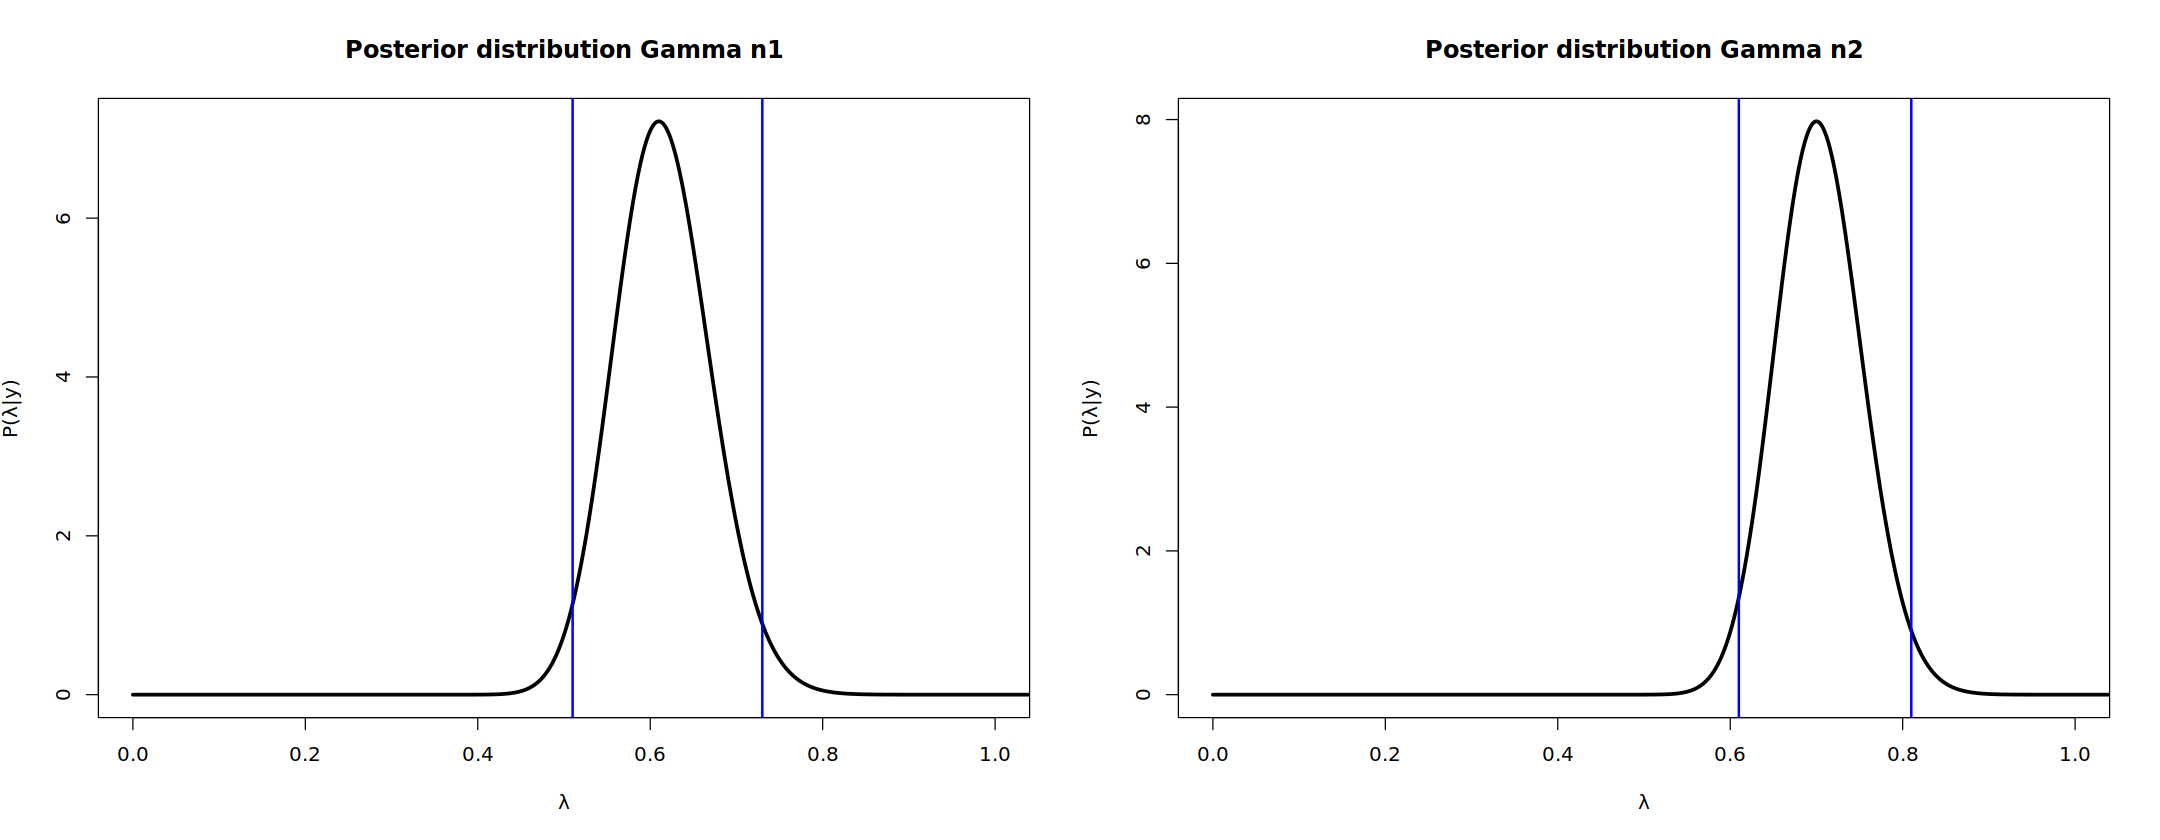

In [3]:
# For gamma derives from uniform prior, alpha = sum(data)+1 
a = 1
calculate_posterior(a)

- assuming now a Jeffreys’ prior,
g(λ) ∝ 1/
√
λ , with λ > 0
compute and plot the posterior distribution for λ, the death rate over the measurement time.
Determine the posterior mean, median and variance, and compute the 95% credibility interval.

The mean n1 is : 0.6125 
The variance n1 is : 0.0030625 
The median n1 is : 0.61 

The mean n2 is : 0.7017857 
The variance n2 is : 0.002506378 
The median n2 is : 0.7 

The total combine mean is : -0.08928571 
The total combine variance is : 0.005568878 

The credibility bound n1 is between  0.51  to  0.73 
Recheck n1 with integration between lower and upper bound gives 0.95 area 

The credibility bound n2 is between  0.61  to  0.8 
Recheck n2 with integration between lower and upper bound gives 0.94 area 


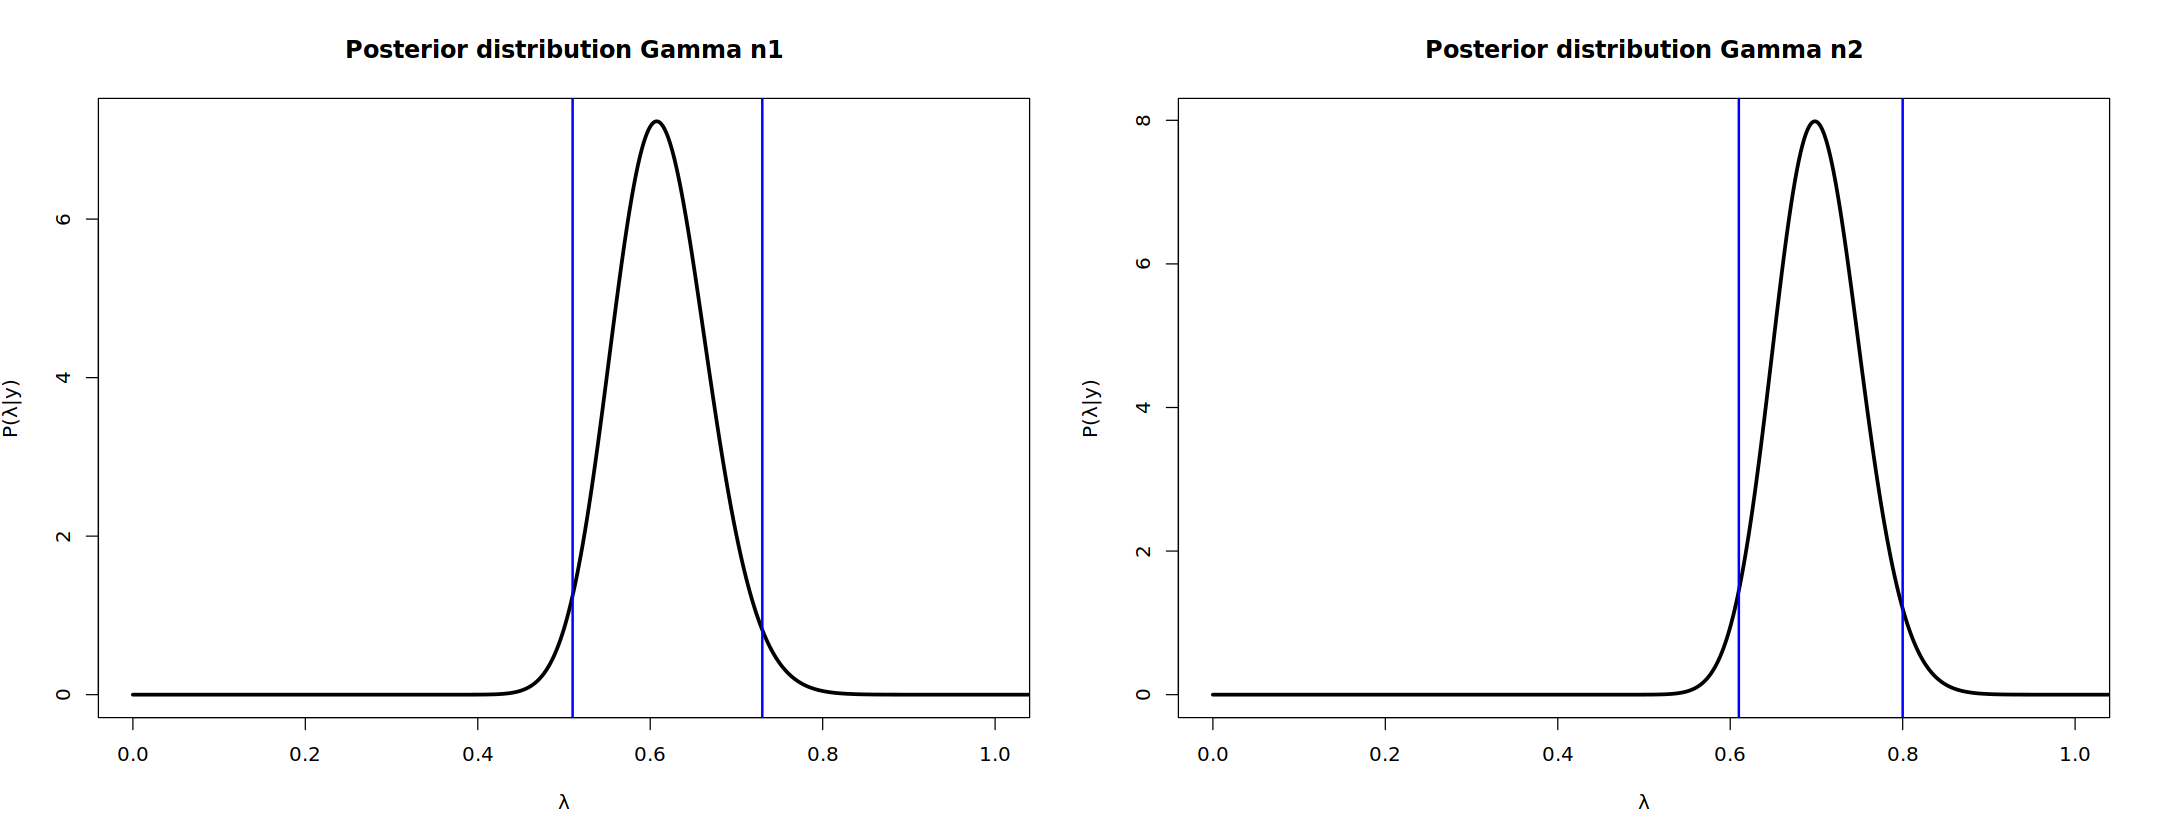

In [4]:
# For gamma derives from uniform prior, alpha = sum(data)+0.5 
calculate_posterior(0.5)

2. Solve Exercise 1 with a Markov Chain Monte Carlo. Build your own MCMC, using the functions
introduced during lectures, or using a MCM library like JAGS.

In [5]:
# Data
n1 <- c(109, 65, 22, 3, 1, 0)
n2 <- c(144, 91, 32, 11, 2, 0)
y <- c(0,1,2,3,4,5)


y_1 <- sum(n1*y)
y_2 <- sum(n2*y)
lambda_1 <- sum(n1)
lambda_2 <- sum(n2)

data_list  <- list(
    alpha_1_unif = y_1+1,#for gamma derives from uniform prior, alpha = sum(data)+1 
    lambda_1 = sum(n1),
    alpha_2_unif = y_2+1,
    lambda_2 = sum(n2),
    alpha_1_jef = y_1+0.5, #for gamma derives from Jeffry's prior, alpha = sum(data)+0.5 
    alpha_2_jef = y_2+0.5 
)

model_s <- '
model {
  x1_unif ~ dgamma(alpha_1_unif, lambda_1)
  x2_unif ~ dgamma(alpha_2_unif, lambda_2)
  x1_jef ~ dgamma(alpha_1_jef, lambda_1)
  x2_jef ~ dgamma(alpha_2_jef, lambda_2)
}
'

jm <- jags.model(textConnection(model_s), data=data_list)
update(jm,1000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 4
   Total graph size: 10

Initializing model




Iterations = 1001:2000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean      SD Naive SE Time-series SE
x1_jef  0.6109 0.05541 0.001752       0.001752
x1_unif 0.6137 0.05592 0.001768       0.001901
x2_jef  0.7034 0.05047 0.001596       0.001596
x2_unif 0.7027 0.04992 0.001579       0.001579

2. Quantiles for each variable:

          2.5%    25%    50%    75%  97.5%
x1_jef  0.5078 0.5719 0.6112 0.6479 0.7178
x1_unif 0.5062 0.5754 0.6120 0.6494 0.7289
x2_jef  0.5983 0.6690 0.7029 0.7343 0.8075
x2_unif 0.6040 0.6672 0.7018 0.7371 0.8038



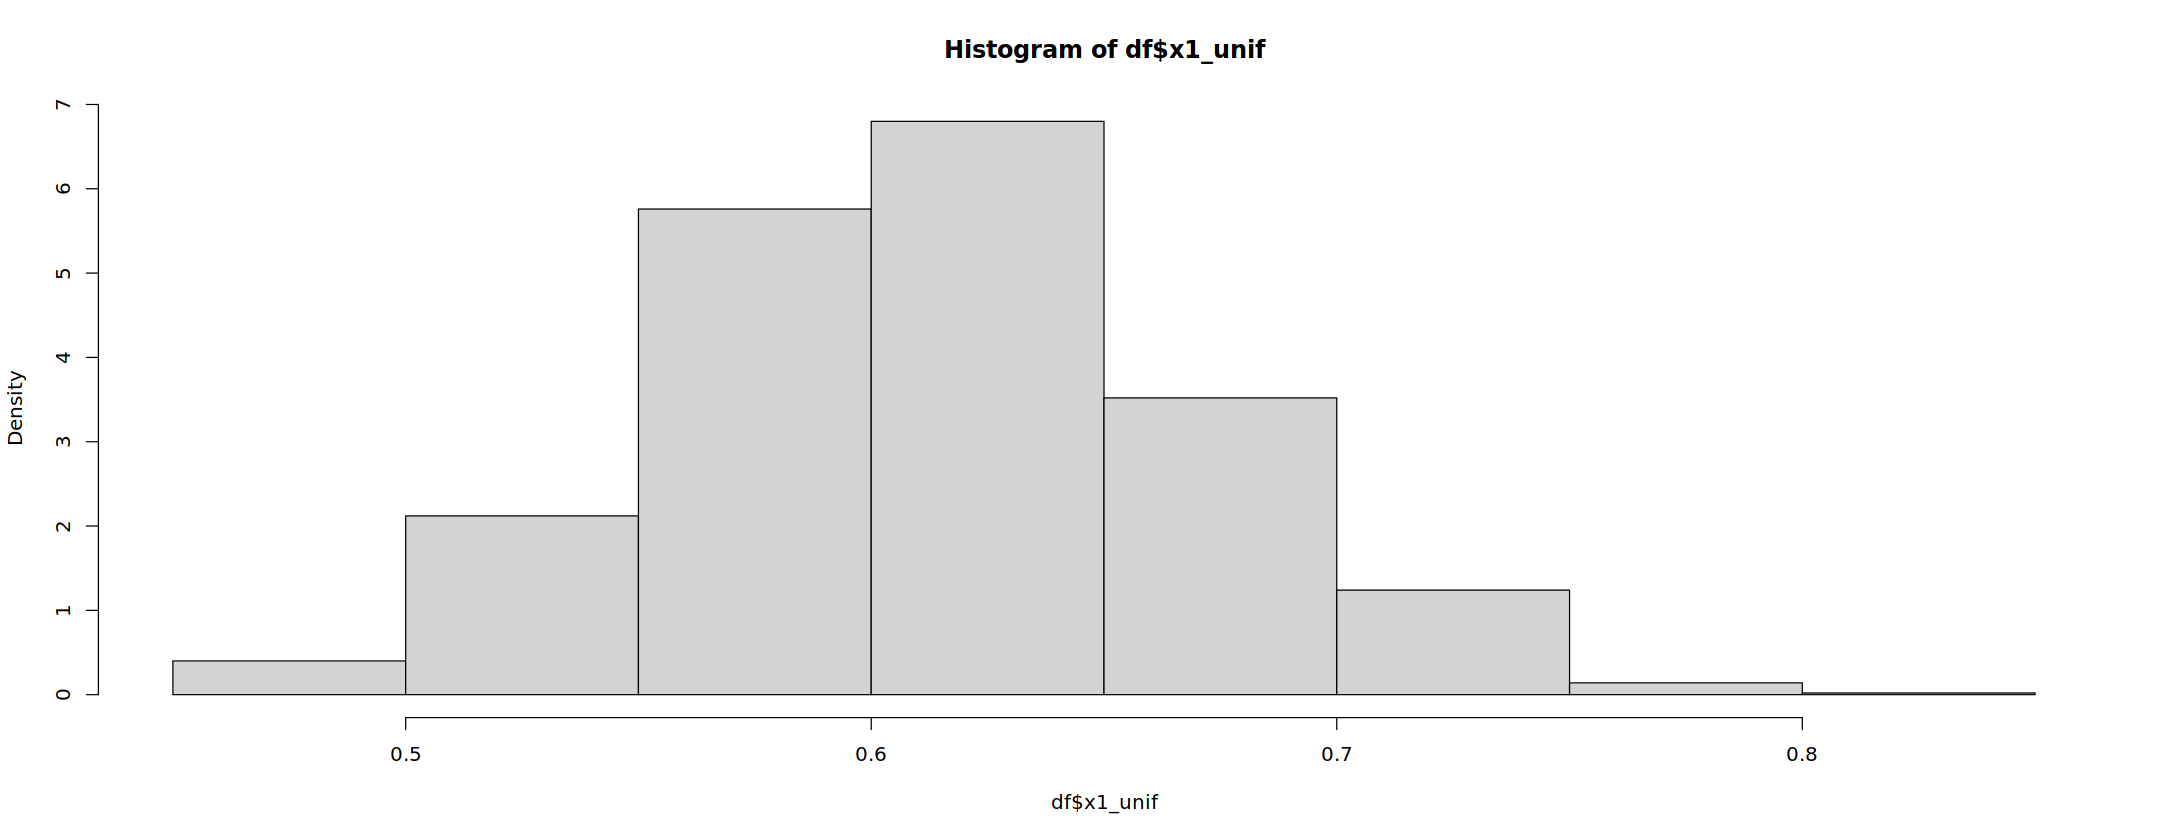

In [6]:
chain <- coda.samples(jm, c("x1_unif","x2_unif","x1_jef","x2_jef"), n.iter=1000)
print(summary(chain))
df <- as.data.frame(as.mcmc(chain))
hist(df$x1_unif, prob=TRUE, nc=10)

3. A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level. Indicating with p the probability that a sample of water taken from the stream has a high bacter
X level,

- find the frequentist estimator for p 
- using a Beta(1, 10) prior for p, calculate and posterior distribution P(p|y)
- find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval
- test the hypotesis
H0 : p = 0.1 versus H1 : p $\neq$ 0.1
at 5% level of significance with both the frequentist and bayesian approach


In [7]:
#count 95% credibility
credibility_bound <- function(x, posterior_function) {
     lower_bound <- round(uniroot(function(x)integrate(posterior_function,0,x)$value-0.025,c(0,1))$root,2)
     upper_bound <- round(uniroot(function(x)integrate(posterior_function,0,x)$value-0.975,c(0,1))$root,2) 
     newarea <- round(integrate(posterior_function,lower_bound,upper_bound)$value,2)                             
     return(c(LB = lower_bound, UB = upper_bound, Area = newarea))}

In [8]:
calculate_posterior <- function(n, y, a, b) {
    
  # Frequentist estimator 
  freq_est = y/n
  cat("The frequentist estimator is ",freq_est, '\n')
  cat('------------------', '\n') 
  cat('BAYESSIAN APPROACH','\n')
    
  # Series of data
  length <- 1000
  p <- seq(0, 1, length.out = length)
  
  # Likelihood function
  likelihood <- function(p) dbinom(y, n, p)
  
  # Prior Beta(1,10)
  prior_beta <- function(p) dbeta(p, a, b)
  
  # Posterior distribution
  posterior <- function(p) likelihood(p) * prior_beta(p)
  normalization_const <- integrate(posterior, 0, 1)$value
  posterior_norm <- function(p) posterior(p) / normalization_const
  
  # Posterior mean and variance
  mean <- sum((posterior_norm(p)) * p) / length
  var <- sum((p - (sum((posterior_norm(p)) * p) / length))^2 * posterior_norm(p)) / length
  
  cat('The mean of the posterior is', mean, '\n')
  cat('The variance of the posterior is', var, '\n')
  
  # Credibility bounds
  lower_bound <-  credibility_bound(p, posterior_norm)["LB"]
  upper_bound <-  credibility_bound(p, posterior_norm)["UB"]
  newarea <-  credibility_bound(p, posterior_norm)["Area"]

  cat("The credibility bound is between ", lower_bound, " to ",upper_bound,"\n")         
  cat("Recheck with integration between lower and upper bound gives",newarea,"area","\n")
  
  # Plotting
  plot(p, posterior_norm(p), type = "l", lwd = 2, xlim = c(0, 0.4),
       main = 'Posterior Distribution',
       xlab = expression(paste(p)), ylab = expression(paste("P(p|y)")))
  abline(v = lower_bound, col = "blue", lty = 1, lwd = 2)
  abline(v = upper_bound, col = "blue", lty = 1, lwd = 2)
    
  cat('------------------', '\n') 
  cat('HYPOTHESIS TESTING','\n')
 #frequentist approach 
    pval_freq = sum(dbinom(y:n,n,0.1))
    if (pval_freq < 0.05){
    cat('According to frequentist approach, pval is', pval_freq, '. Therefore the hypothesis is rejected',"\n")
    }else {
    cat('According to frequentist approach, pval is', pval_freq, '. Therefore the hypothesis is not rejected',"\n")}
    
    #bayesian approach
    pval_bayes <- integrate(posterior_norm, 0, 0.1)$value
    if (pval_bayes < 0.05){
        cat('According to bayesian approach, pval is', pval_bayes, '. Therefore the hypothesis is rejected',"\n")
    }else {
        cat('According to bayesian approach, pval is', pval_bayes, '. Therefore the hypothesis is not rejected',"\n")}
  }


The frequentist estimator is  0.09482759 
------------------ 
BAYESSIAN APPROACH 
The mean of the posterior is 0.0943937 
The variance of the posterior is 0.0006677793 
The credibility bound is between  0.05  to  0.15 
Recheck with integration between lower and upper bound gives 0.95 area 
------------------ 
HYPOTHESIS TESTING 
According to frequentist approach, pval is 0.6189754 . Therefore the hypothesis is not rejected 
According to bayesian approach, pval is 0.614185 . Therefore the hypothesis is not rejected 


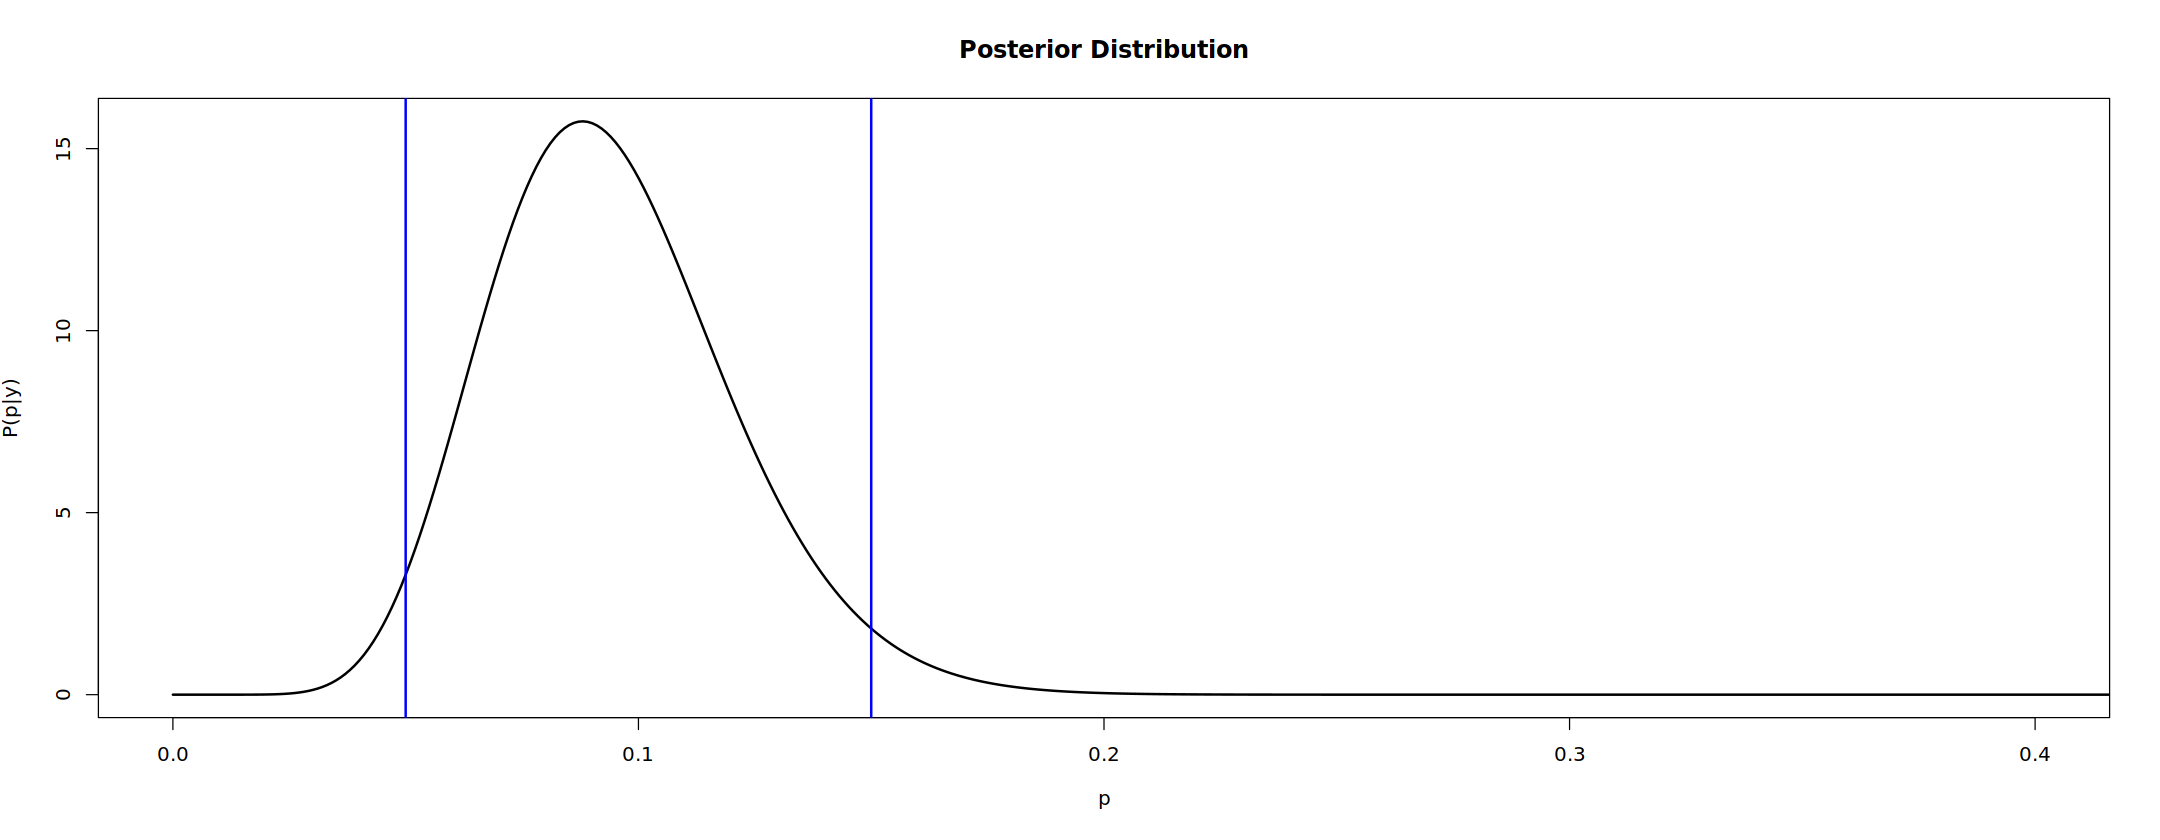

In [9]:
y = 11
n = 116
a = 1 
b = 10
calculate_posterior(n,y,a,b)

- a new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level 
- assuming both a Beta(1, 10) prior for p

The frequentist estimator is  0.05454545 
------------------ 
BAYESSIAN APPROACH 
The mean of the posterior is 0.05676136 
The variance of the posterior is 0.0003024681 
The credibility bound is between  0.03  to  0.1 
Recheck with integration between lower and upper bound gives 0.94 area 
------------------ 
HYPOTHESIS TESTING 
According to frequentist approach, pval is 0.9870941 . Therefore the hypothesis is not rejected 
According to bayesian approach, pval is 0.9842592 . Therefore the hypothesis is not rejected 


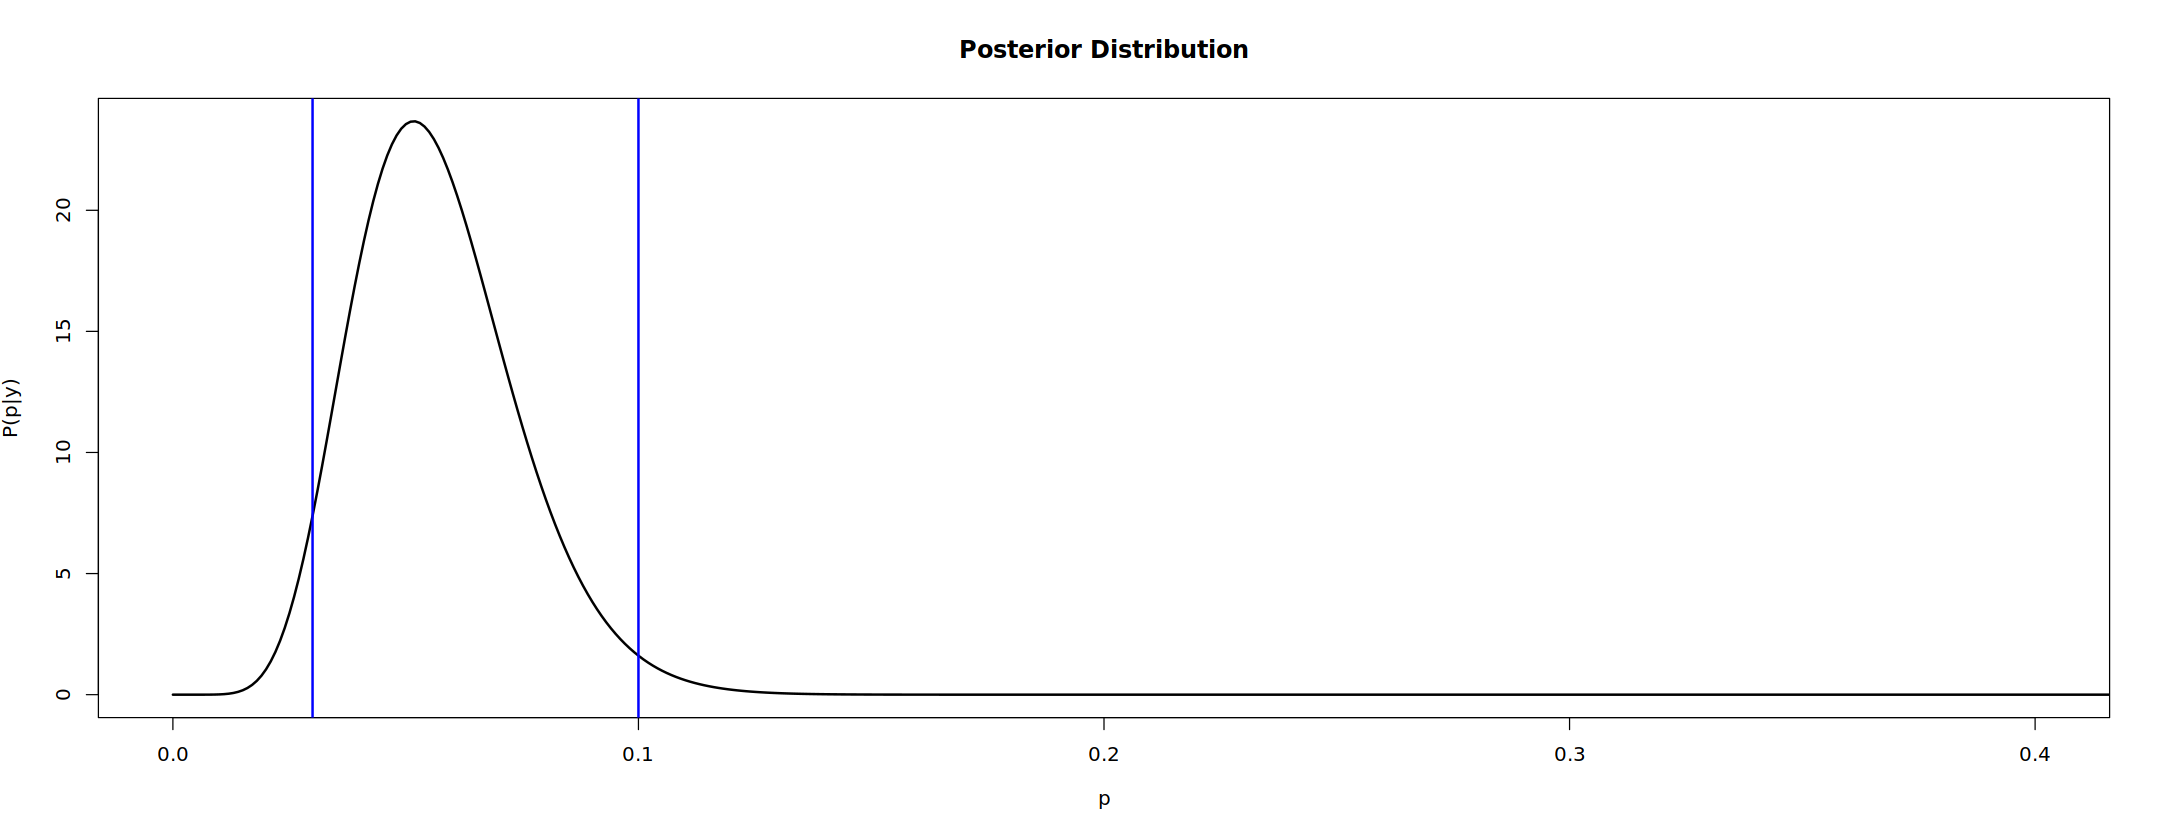

In [10]:
y = 9
n = 165
a = 1 
b = 10
calculate_posterior(n,y,a,b)

- Assuming the posterior probability of the older measurement as the prior for the new one

The frequentist estimator is  0.05454545 
------------------ 
BAYESSIAN APPROACH 
The mean of the posterior is 0.07184589 
The variance of the posterior is 0.0002275782 
The credibility bound is between  0.05  to  0.1 
Recheck with integration between lower and upper bound gives 0.9 area 
------------------ 
HYPOTHESIS TESTING 
According to frequentist approach, pval is 0.9870941 . Therefore the hypothesis is not rejected 
According to bayesian approach, pval is 0.9588299 . Therefore the hypothesis is not rejected 


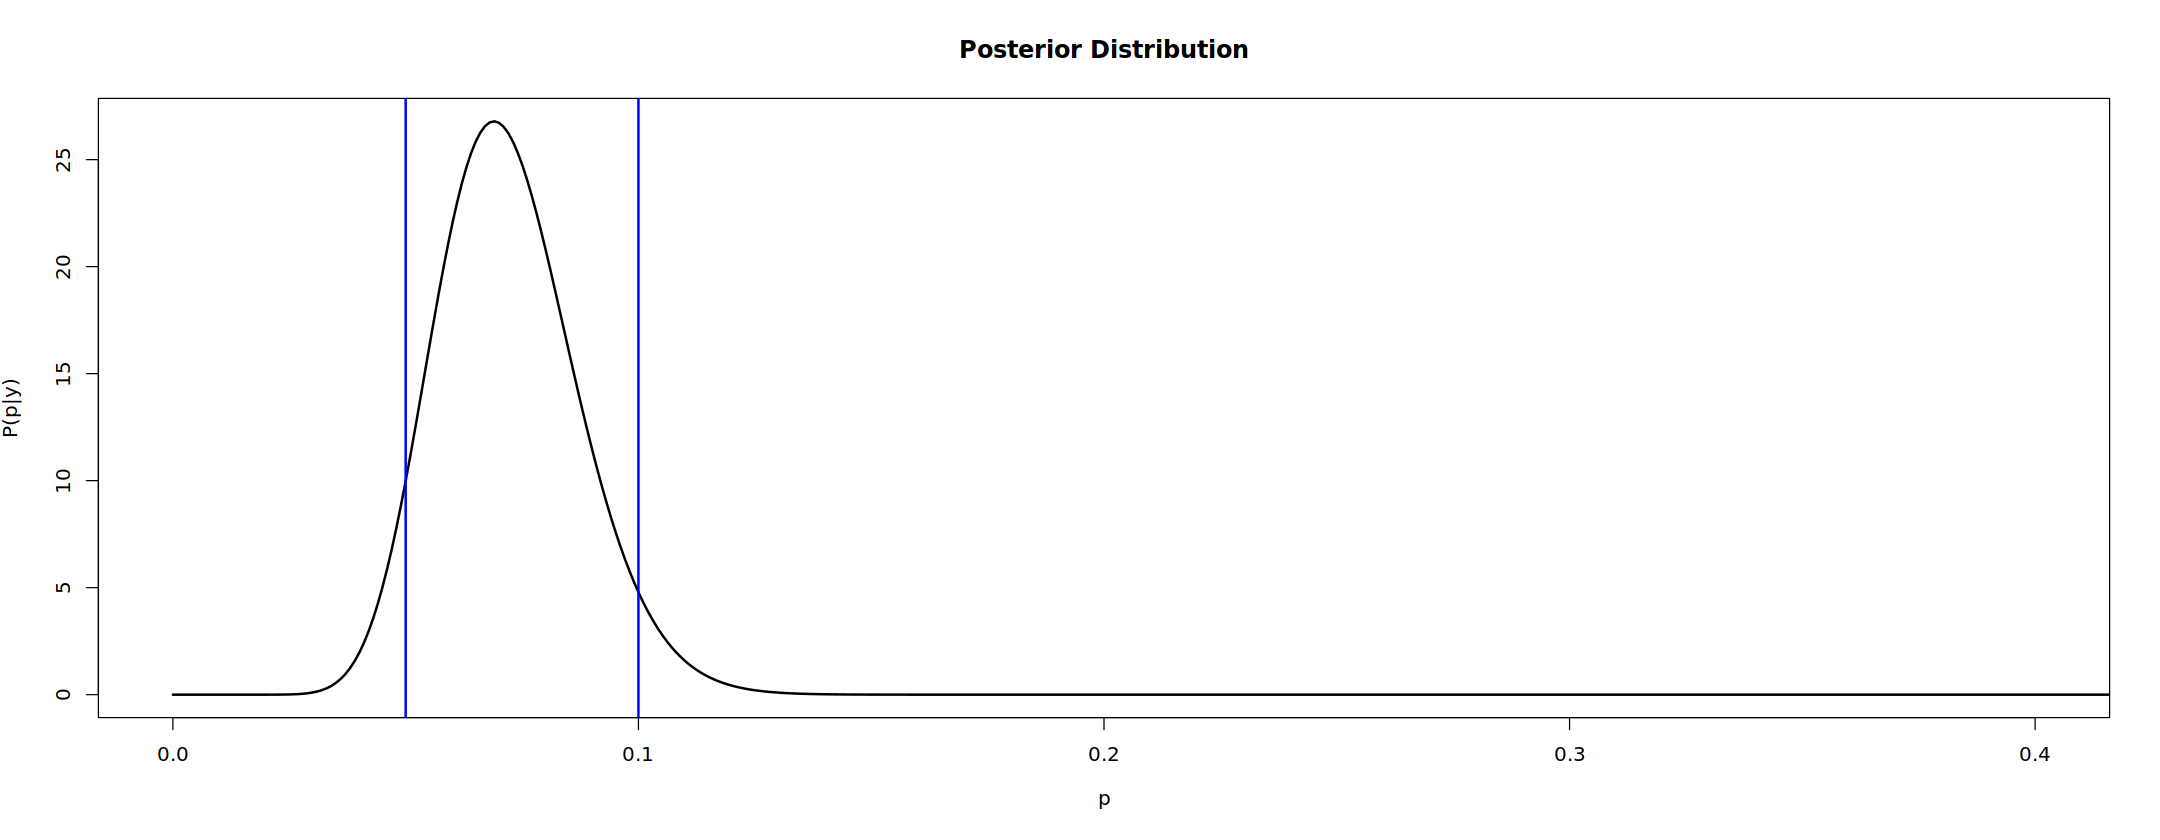

In [11]:
y = 9
n = 165
a_post_before = 1+11
b_post_before = 10+(116-11)
calculate_posterior(n,y,a_post_before,b_post_before)

4. Analyze the data of Exercise 3 and solve points (b) and (c) using a MCMC with JAGS

(b) using a Beta(1, 10) prior for p, calculate and posterior distribution P(p|y)

(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [12]:
ms.str <- 'model{
    for (i in 1:length(X)){
     X[i] ~dbern(p);
}
    p ~ dbeta(1,10);
    y ~ dbin(p,n);
}'

n <- 116
y <- 11
X <- c(rep(0,n-y), rep(1,y))

data <- NULL
data$X <- X
data$n <- n

mm <- jags.model(textConnection(ms.str), data = data)

update(mm,1000)
cc <- coda.samples(mm,c('p'), n.iter=10000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 116
   Unobserved stochastic nodes: 2
   Total graph size: 121

Initializing model



In [13]:
msd <- 'model{
    for (i in 1:length(X)){
    X[i]~dbern(p);
}
    p ~ dbeta(1,10);
    y ~ dbin(p,n);
}'

n <- 116
y <- 11
X <- c(rep(0,n-y), rep(1,y))

data <- NULL
data$X <- X
data$n <- n

dd <- jags.model(textConnection(msd), data = data)
update(dd,1000)
cc <- coda.samples(dd, c('p'), n.iter=10000)



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 116
   Unobserved stochastic nodes: 2
   Total graph size: 121

Initializing model



In [14]:
# Jaggs model
model.str <- '
model {
  for (i in 1:length(X)) {
    X[i] ~ dbern(p);
  }
  p ~ dbeta(1, 10);
  y ~ dbin(p, n);
}
'
# Make a binary list of data where 1 means high bacter X and 0 is safe
n <- 116
y <- 11
X <- c(rep(0, n - y), rep(1, y))

# Data for Model 
data <- NULL
data$X <- X # Set of observations
data$n <- n # those to be considered


# Compile the model
jm <- jags.model(textConnection(model.str), data = data)

# Update the Markov chain (Burn-in)
update(jm, 1000)
chain <- coda.samples(jm, c("p"), n.iter = 10000)

# Data extraction as matrix
chain.df <- as.data.frame(as.mcmc(chain))
post_dist <- chain.df$p
bayes_est <- mean(post_dist)

# Calculate mean and variance
post_mean <- mean(post_dist)
post_var <- var(post_dist)

# Calculate the 95% credible interval
cred_interval <- quantile(post_dist, c(0.025, 0.975))


cat('Bayesian Estimator for p:',bayes_est, "\n")
cat("Posterior Mean:",post_mean,"\n")
cat("Posterior Variance:",post_var, "\n")
cat("95% Credible Interval:",cred_interval, "\n")

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 116
   Unobserved stochastic nodes: 2
   Total graph size: 121

Initializing model

Bayesian Estimator for p: 0.09437868 
Posterior Mean: 0.09437868 
Posterior Variance: 0.0006609042 
95% Credible Interval: 0.05036981 0.150036 


In [15]:
quantile(post_dist,c(0.025,0.975))

2.5%      97.5% 
0.05036981 0.15003601

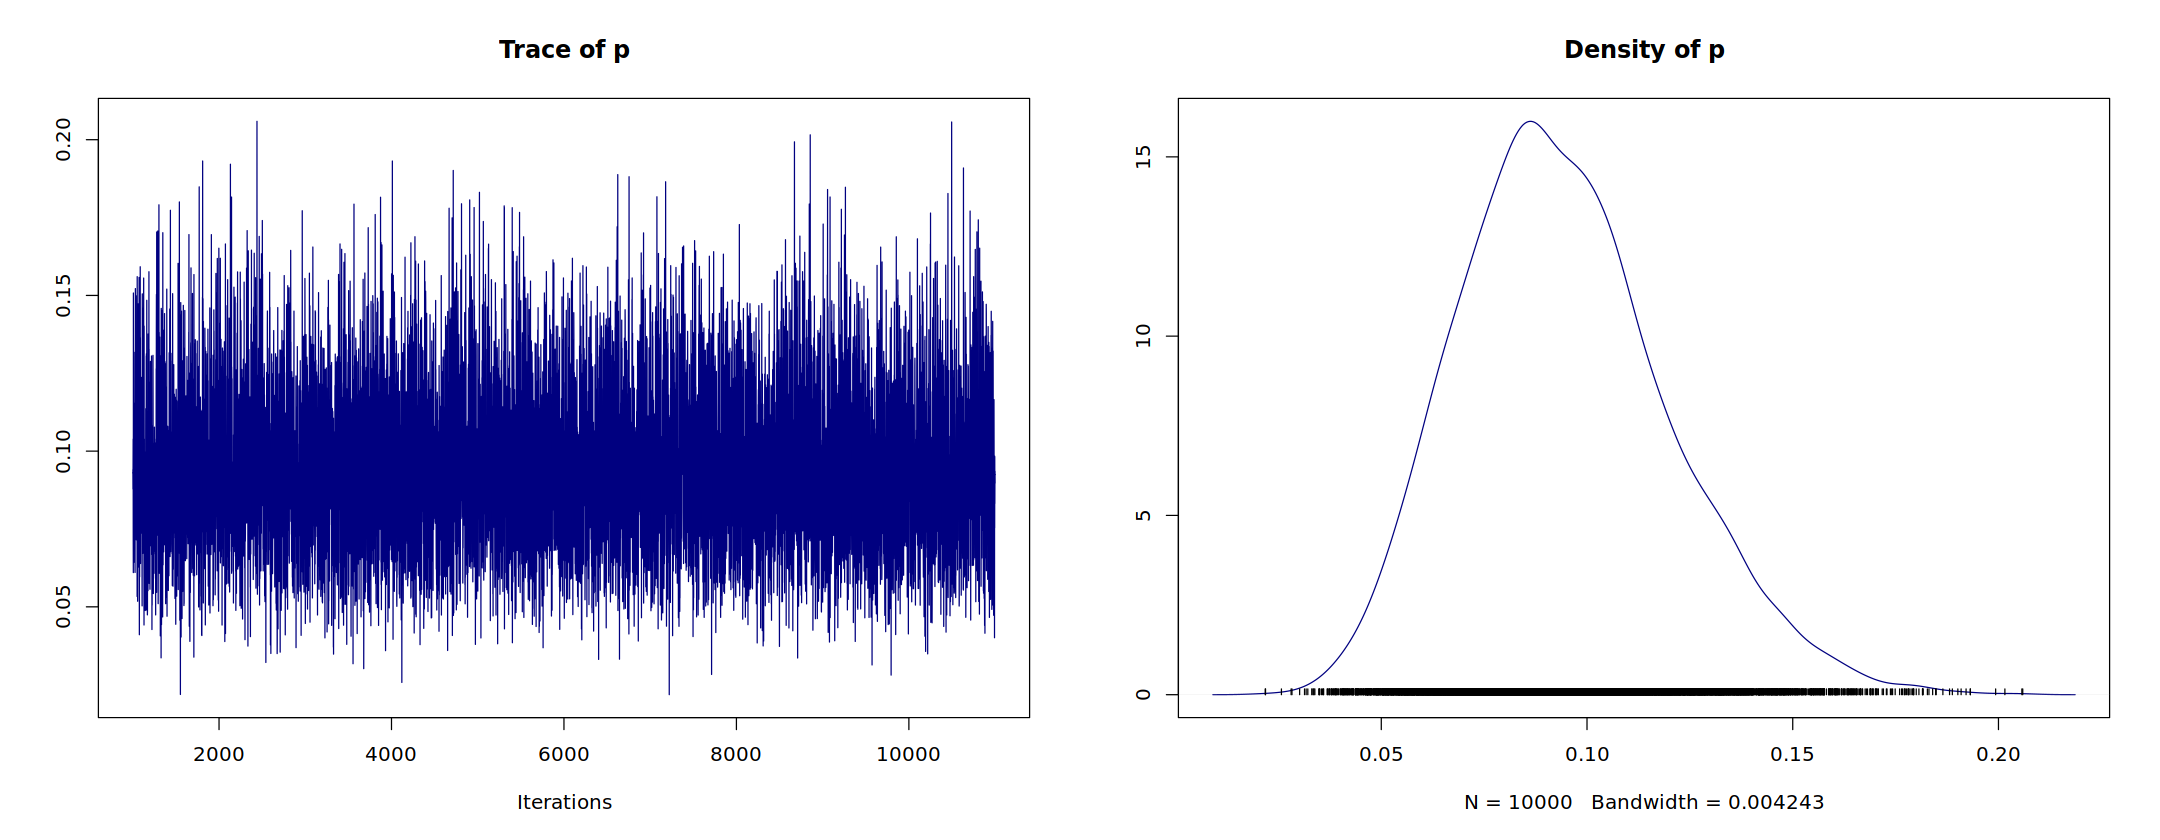

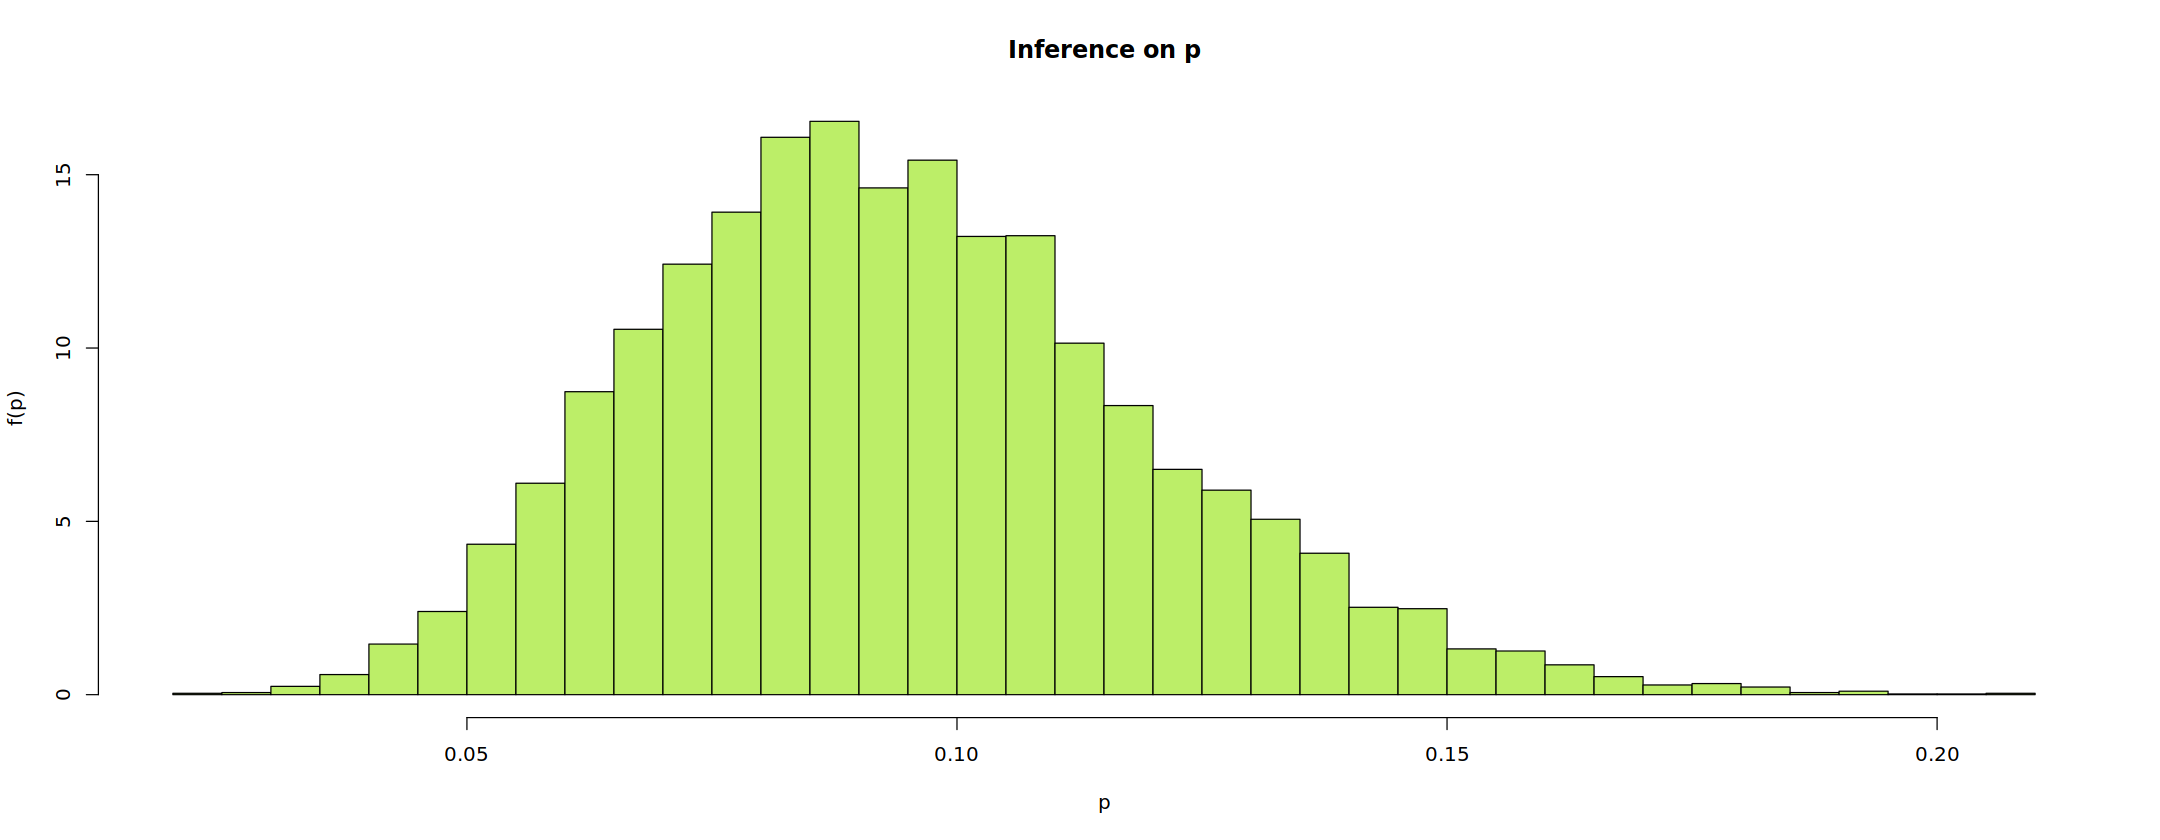

In [16]:
#chain plotting
plot(chain , col="navy")

# Inference result
hist(post_dist, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='p', ylab='f(p)', main='Inference on p')